# **Tutorial for Polynomial Regression**

First step, let's talk about **linear regression** because **polynomial regression** is a **higher-dimensional** version of **linear regression**.

## **Linear Regression**

Assume we have some data that contains two features, we may want to find a **function** to fit one of the features as input and the other one as output. If the function is an **linear function** then what we do is called **linear regression**.

For example:

### **Mathematics**

The data we want to do linear regression:

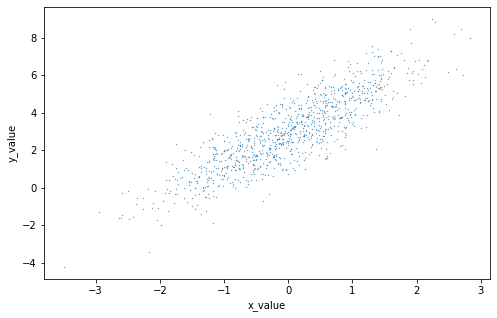

Our fitting function:

$f(x)=w_{0}+w_{1}x$

Our task is to find out $w_{0}$ and $w_{1}$ that can best fit the data.

We can write down each point $i$ of the data in a vector: 

$p_{i}=\begin{bmatrix}
1\\x_{i}
\end{bmatrix}$

Now, write them down in a matrix and then transpose it:

$P=
\begin{bmatrix}
1 & 1 & \dots & 1\\
x_{0} & x_{1} & \dots & x_{n}\\
\end{bmatrix}^T
=\begin{bmatrix}
1 & x_{0}\\
1 & x_{1}\\
\vdots & \vdots \\
1 & x_{n}
\end{bmatrix}$

To get $y$ of all the points, multiply with a vector:

$W=\begin{bmatrix}
w_{0}\\
w_{1}
\end{bmatrix}$

We can write down this equation to describe all the points:

$\begin{bmatrix}
1 & x_{0}\\
1 & x_{1}\\
\vdots & \vdots \\
1 & x_{n}
\end{bmatrix}
\begin{bmatrix}
w_{0}\\
w_{1}
\end{bmatrix}=
\begin{bmatrix}
w_{0}+w_{1}x_{0}\\ 
w_{0}+w_{1}x_{1}\\
\vdots\\
w_{0}+w_{1}x_{n}
\end{bmatrix}=
\begin{bmatrix}
\hat{y_{0}}\\
\hat{y_{1}}\\
\vdots\\
\hat{y_{n}}
\end{bmatrix}$

To find out the best $W$, we will use **gradient decent**.

First, define the **loss function**:

$loss=\sum_{i=0}^{N} \frac{(\hat{y_{i}}-y_{i})^2}{2N}=
sum(
\begin{bmatrix}
(\hat{y_{0}}-y_{0})^2\\
(\hat{y_{1}}-y_{1})^2\\
\vdots\\
(\hat{y_{n}}-y_{n})^2
\end{bmatrix}
)$

If we define

$Y=
\begin{bmatrix}
y_{0}\\
y_{1}\\
\vdots\\
y_{n}
\end{bmatrix}$

then the loss function will become

$loss(W)=
sum(
(PW-Y)^2
)$

### **Implement with Tensorflow**

In [1]:
!pip install tensorflow==2.0.0b1
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
num_data = 1000

def func(x):
    val = 1.7 * x + 3
    return val

# generate a random dataset
x = tf.random.normal([num_data], dtype=tf.double)
x = tf.sort(x)
y = func(x) + tf.random.normal([num_data], dtype=tf.double)

Text(0, 0.5, 'y_value')

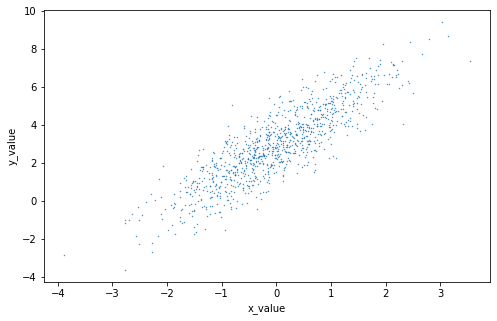

In [3]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.plot(x, y, "o", markersize=0.4)
ax.set_xlabel("x_value")
ax.set_ylabel("y_value")

In [0]:
# create pipeline to feed data
def input_fn(X, Y, epoch):
  dataset = tf.data.Dataset.from_tensor_slices((X, Y))
  dataset = dataset.batch(X.shape[0]).repeat(epoch)
  return dataset.__iter__()

@tf.function
def predict(P, W):
  return tf.matmul(P, W)

@tf.function
def loss_fn(Y_pred, Y):
  s = tf.reduce_sum(tf.square(Y_pred - Y))
  return s / (Y.shape[0] / 2)

@tf.function
def generate_P(X, dim=2):
  P = tf.ones(shape=(X.shape[0], 1), dtype=tf.double)
  for i in range(1, dim):
    P = tf.concat((
        P, tf.pow(X, i)
    ), axis=1)
  return P

In [0]:
X = tf.reshape(x, (num_data, 1))
P = generate_P(X, 2)
Y = tf.reshape(y, (num_data, 1))

W = tf.Variable(tf.random.normal([2, 1], dtype=tf.double))

In [6]:
# P and W are able to do matrix multiplication
# the result and Y should have the same shape
print(f"dimension of P: {P.shape}")
print(f"dimension of W: {W.shape}")
print(f"dimension of Y: {Y.shape}")

dimension of P: (1000, 2)
dimension of W: (2, 1)
dimension of Y: (1000, 1)


In [7]:
epochs = 50
inputs = input_fn(P, Y, epochs)

for e in range(1, epochs + 1):
  with tf.GradientTape() as tape:
    _P, _Y = inputs.get_next()
    # print(_P.shape)
    pred = predict(_P, W)
    loss = loss_fn(pred, _Y)

    if e % 5 == 0:
      print(f"epoch: {e:3d}, loss: {loss.numpy():5.3f}")
    
    # get the gradients
    [dW] = tape.gradient(loss, [W])
    # apply gradients to W
    W.assign_sub(0.01 * dW)

epoch:   5, loss: 23.400
epoch:  10, loss: 16.304
epoch:  15, loss: 11.557
epoch:  20, loss: 8.381
epoch:  25, loss: 6.256
epoch:  30, loss: 4.834
epoch:  35, loss: 3.883
epoch:  40, loss: 3.246
epoch:  45, loss: 2.820
epoch:  50, loss: 2.535


Text(0, 0.5, 'y_value')

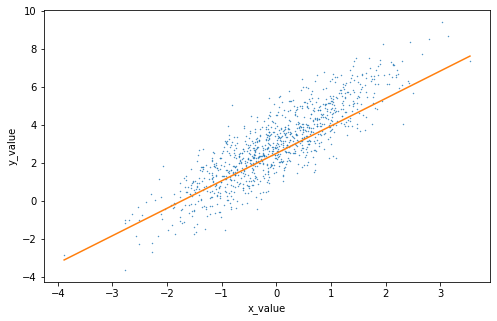

In [8]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.plot(x, y, "o", markersize=0.4)
ax.plot(x, predict(P, W))
ax.set_xlabel("x_value")
ax.set_ylabel("y_value")

## **Polynomial Regression**

We have discussed about **linear regression**, in fact, **polynomial regression** is very similar to that.

### **Mathematics**

This time, out data is like below:

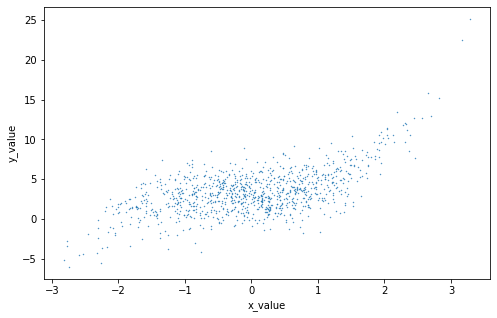

It doesn't seem to be linear.

Let's make some changes on our fitting function:

$f(x)=w_{0}+w_{1}x+w_{2}x^2+w_{3}x^3$

We can still write down each point $i$ of the data in a vector: 

$p_{i}=\begin{bmatrix}
1\\x_{i}\\x_{i}^2\\x_{i}^3
\end{bmatrix}$

Again, write them down in a matrix and then transpose it:

$P=
\begin{bmatrix}
1 & 1 & \dots & 1\\
x_{0} & x_{1} & \dots & x_{n}\\
x_{0}^2 & x_{1}^2 & \dots & x_{n}^2\\
x_{0}^3 & x_{1}^3 & \dots & x_{n}^3\\
\end{bmatrix}^T
=\begin{bmatrix}
1 & x_{0} & x_{0}^2 & x_{0}^3\\
1 & x_{1} & x_{1}^2 & x_{1}^3\\
\vdots & \vdots& \vdots & \vdots\\
1 & x_{n} & x_{n}^2 & x_{n}^3
\end{bmatrix}$

Now, it's easy to write down $W$:

$W=\begin{bmatrix}
w_{0}\\
w_{1}\\
w_{2}\\
w_{3}
\end{bmatrix}$

After a long trip, we finally have:

$\begin{bmatrix}
1 & x_{0} & x_{0}^2 & x_{0}^3\\
1 & x_{1} & x_{1}^2 & x_{1}^3\\
\vdots & \vdots& \vdots & \vdots\\
1 & x_{n} & x_{n}^2 & x_{n}^3
\end{bmatrix}
\begin{bmatrix}
w_{0}\\
w_{1}\\
w_{2}\\
w_{3}
\end{bmatrix}=
\begin{bmatrix}
w_{0}+w_{1}x_{0}+w_{2}x_{0}^2+w_{3}x_{0}^3\\ 
w_{0}+w_{1}x_{1}+w_{2}x_{1}^2+w_{3}x_{1}^3\\
\vdots\\
w_{0}+w_{1}x_{n}+w_{2}x_{n}^2+w_{3}x_{n}^3
\end{bmatrix}=
\begin{bmatrix}
\hat{y_{0}}\\
\hat{y_{1}}\\
\vdots\\
\hat{y_{n}}
\end{bmatrix}$

The loss funtion **doesn't change at all**:

$loss=\sum_{i=0}^{N} \frac{(\hat{y_{i}}-y_{i})^2}{N}=
sum(
\begin{bmatrix}
(\hat{y_{0}}-y_{0})^2\\
(\hat{y_{1}}-y_{1})^2\\
\vdots\\
(\hat{y_{n}}-y_{n})^2
\end{bmatrix}
)$

$loss(W)=
sum(
(PW-Y)^2
)$

Now, hope you already found out how to train a simple model to fit our second data!

In [0]:
num_data = 1000

def func(x):
    val = 0.4 * x**3 + 0.2 * x**2 + 0.2 * x + 2
    return val

# generate a random dataset
x = tf.random.normal([num_data], dtype=tf.double)
x = tf.sort(x)
y = func(x) + tf.random.normal([num_data], dtype=tf.double) * 2

Text(0, 0.5, 'y_value')

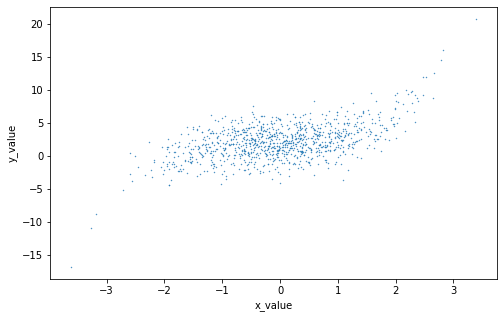

In [10]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.plot(x, y, "o", markersize=0.4)
ax.set_xlabel("x_value")
ax.set_ylabel("y_value")

In [0]:
# create pipeline to feed data
def input_fn(X, Y, epoch):
  dataset = tf.data.Dataset.from_tensor_slices((X, Y))
  dataset = dataset.batch(X.shape[0]).repeat(epoch)
  return dataset.__iter__()

@tf.function
def predict(P, W):
  return tf.matmul(P, W)

@tf.function
def loss_fn(Y_pred, Y):
  s = tf.reduce_sum(tf.square(Y_pred - Y))
  return s / (Y.shape[0] * 2)

@tf.function
def generate_P(X, dim=2):
  P = tf.ones(shape=(X.shape[0], 1), dtype=tf.double)
  for i in range(1, dim):
    P = tf.concat((
        P, tf.pow(X, i)
    ), axis=1)
  return P

In [0]:
X = tf.reshape(x, (num_data, 1))
P = generate_P(X, 4)
Y = tf.reshape(y, (num_data, 1))

W = tf.Variable(tf.random.normal([4, 1], dtype=tf.double))

In [13]:
# P and W are able to do matrix multiplication
# the result and Y should have the same shape
print(f"dimension of P: {P.shape}")
print(f"dimension of W: {W.shape}")
print(f"dimension of Y: {Y.shape}")

dimension of P: (1000, 4)
dimension of W: (4, 1)
dimension of Y: (1000, 1)


In [14]:
epochs = 50
inputs = input_fn(P, Y, epochs)

for e in range(1, epochs + 1):
  with tf.GradientTape() as tape:
    _P, _Y = inputs.get_next()
    pred = predict(_P, W)
    loss = loss_fn(pred, _Y)

    if e % 5 == 0:
      print(f"epoch: {e:3d}, loss: {loss.numpy():5.3f}")
    
    # get the gradients
    [dW] = tape.gradient(loss, [W])
    # apply gradients to W
    W.assign_sub(0.01 * dW)

epoch:   5, loss: 11.122
epoch:  10, loss: 6.384
epoch:  15, loss: 5.089
epoch:  20, loss: 4.449
epoch:  25, loss: 4.026
epoch:  30, loss: 3.722
epoch:  35, loss: 3.496
epoch:  40, loss: 3.324
epoch:  45, loss: 3.190
epoch:  50, loss: 3.083


Text(0, 0.5, 'y_value')

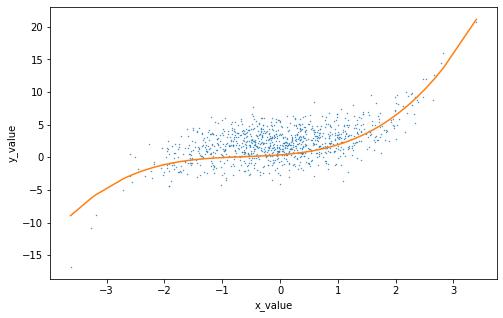

In [15]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.plot(x, y, "o", markersize=0.4)
ax.plot(x, predict(P, W))
ax.set_xlabel("x_value")
ax.set_ylabel("y_value")

## **Test Model with Common Dataset**

In [0]:
import pandas as pd
url = "https://raw.githubusercontent.com/tom1484/Tutorial-for-Polynomial-Regression/master/Position_Salaries.csv"
csv = pd.read_csv(url)

In [0]:
data = csv.to_numpy()[:,1:]
num_data = data.shape[0]

x = data[:,0].astype(np.double)
y = data[:,1].astype(np.double)

Text(0, 0.5, 'salary')

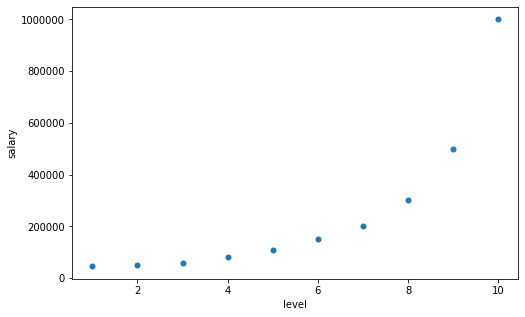

In [18]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.plot(x, y, "o", markersize=5)
ax.set_xlabel("level")
ax.set_ylabel("salary")

Before training, let's put all the stuffs together!

\*note: We will use **normalization** below, you can go to [here](https://en.wikipedia.org/wiki/Normalization_(statistics)).

In [0]:
class Regression:
  def __init__(self, power):
    self.power = power
    self.W = tf.Variable(tf.random.normal([power, 1], dtype=tf.double))

  def _input_fn(self, X, Y, epoch):
    dataset = tf.data.Dataset.from_tensor_slices((X, Y))
    dataset = dataset.batch(X.shape[0]).repeat(epoch)
    return dataset.__iter__()

  def _predict(self, P, W):
    return tf.matmul(P, W)

  def _loss_fn(self, Y_pred, Y):
    s = tf.reduce_sum(tf.square(Y_pred - Y))
    return s / (Y.shape[0] * 2)

  def _generate_P(self, X, dim):
    P = tf.ones(shape=(X.shape[0], 1), dtype=tf.double)
    for i in range(1, dim):
      P = tf.concat((
          P, tf.pow(X, i)
      ), axis=1)
    return P

  def _normalize(self, X, Y):
    # for dataset X, normalization:
    # (X - X_ave) / X_std
    self.X_std = tf.math.reduce_std(X, axis=0)
    self.X_ave = tf.reduce_mean(X)
    self.Y_std = tf.math.reduce_std(Y, axis=0)
    self.Y_ave = tf.reduce_mean(Y)
    return (X - self.X_ave) / self.X_ave, (Y - self.Y_ave) / self.Y_std
  
  def predict(self, x):
    X = (tf.reshape(x, (num_data, 1)) - self.X_ave) / self.X_std
    P = self._generate_P(X, self.power)
    # do the reverse of normalization
    return self._predict(P, self.W) * self.Y_std + self.Y_ave

  def train(self, X, Y, learning_rate=0.01, epochs=10, num_print=10):
    X, Y = self._normalize(X, Y)

    P = self._generate_P(X, self.power)
    inputs = self._input_fn(P, Y, epochs)

    for e in range(1, epochs + 1):
      with tf.GradientTape() as tape:
        _P, _Y = inputs.get_next()
        pred = self._predict(_P, self.W)
        loss = self._loss_fn(pred, _Y)

        if e % int(epochs / num_print) == 0:
          print(f"epoch: {e:3d}, loss: {loss.numpy():5.3f}")
        
        # get the gradients
        [dW] = tape.gradient(loss, [self.W])
        # apply gradients to W
        self.W.assign_sub(learning_rate * dW)

In [0]:
X = tf.reshape(x, (num_data, 1))
Y = tf.reshape(y, (num_data, 1))

In [21]:
model = Regression(3)
model.train(X, Y, 0.1, 200, 10)

epoch:  20, loss: 0.443
epoch:  40, loss: 0.315
epoch:  60, loss: 0.246
epoch:  80, loss: 0.201
epoch: 100, loss: 0.169
epoch: 120, loss: 0.144
epoch: 140, loss: 0.124
epoch: 160, loss: 0.108
epoch: 180, loss: 0.095
epoch: 200, loss: 0.085


Text(0, 0.5, 'salary')

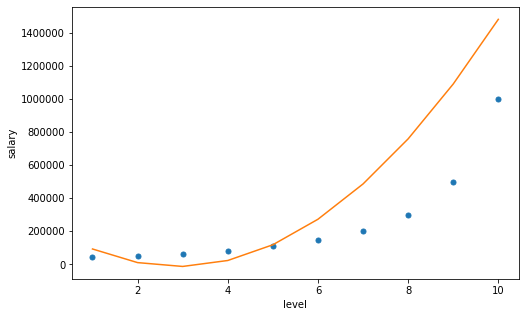

In [22]:
plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.plot(x, y, "o", markersize=5)
ax.plot(x, model.predict(x))
ax.set_xlabel("level")
ax.set_ylabel("salary")